In [390]:
import numpy as np
import matplotlib.pyplot as plt


In [391]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [392]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

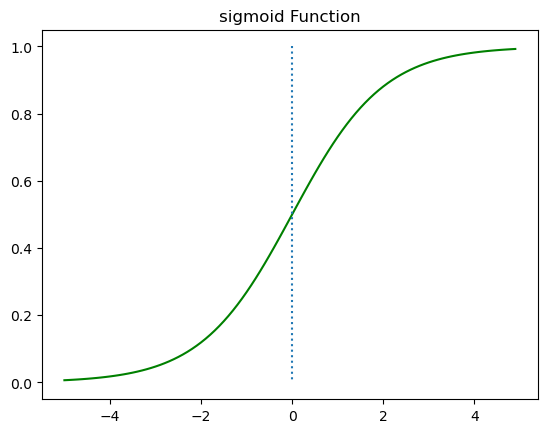

In [393]:
plt.plot(x,y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('sigmoid Function')
plt.show()

In [394]:
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

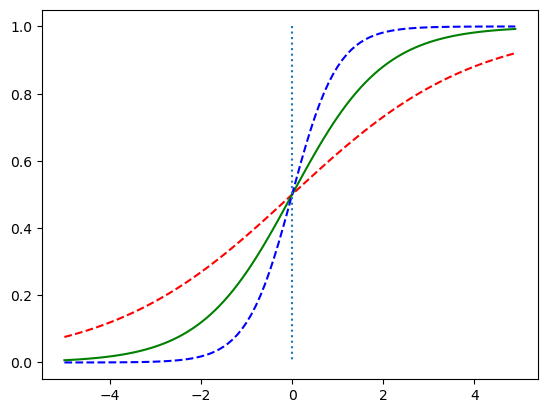

In [395]:
plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.show()

In [396]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [397]:
torch.manual_seed(1)

In [398]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [399]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [400]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

In [401]:
optimizer = optim.SGD([W,b], lr=1)
nb_epochs = 1000
costs = []

In [402]:
for epoch in range(nb_epochs):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())
    if epoch % 100 ==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888


In [403]:
h2 = torch.sigmoid(x_train.matmul(W) + b)
print(h2)

tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [404]:
prediction = hypothesis>=torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [405]:
print(W)
print(b)

tensor([[3.2521],
        [1.5174]], requires_grad=True)
tensor([-14.4777], requires_grad=True)


<Axes: >

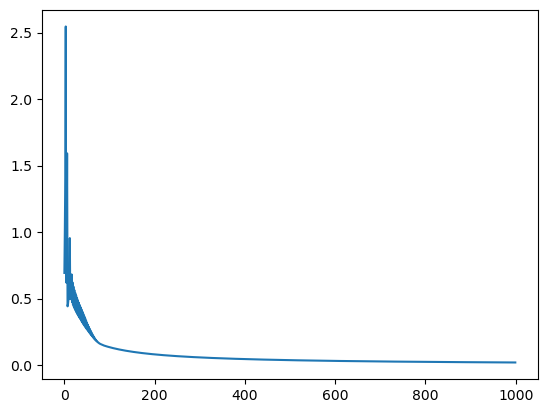

In [406]:
import pandas as pd
s1 = pd.Series(costs)
s1.plot()

In [407]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [408]:
model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [409]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epochs = 10000
costs = []
accuracy_list = []

In [410]:
for epoch in range(nb_epochs):
    h = model(x_train)
    cost = F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())
    if epoch % 100 == 0:
        prediction=h>=torch.FloatTensor([0.5])
        correct_pred = prediction.float()==y_train
        accuracy=correct_pred.sum().item()/len(correct_pred)
        accuracy_list.append(accuracy)
        print('correct_pred', correct_pred)
        print('epoch:',epoch, 'cost:', cost)

correct_pred tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 0 cost: tensor(0.5397, grad_fn=<BinaryCrossEntropyBackward0>)
correct_pred tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 100 cost: tensor(0.4077, grad_fn=<BinaryCrossEntropyBackward0>)
correct_pred tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 200 cost: tensor(0.3456, grad_fn=<BinaryCrossEntropyBackward0>)
correct_pred tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 300 cost: tensor(0.2983, grad_fn=<BinaryCrossEntropyBackward0>)
correct_pred tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 400 cost: tensor(0.2612, grad_fn=<BinaryCrossEntropyBackward0>)
correct_pred tensor([[True],
        [True],
        [True],
      

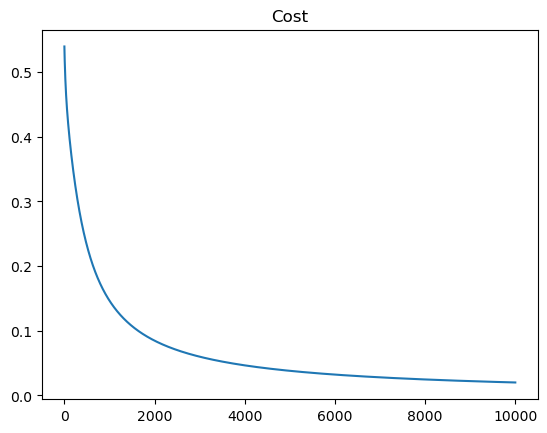

In [411]:
s1 = pd.Series(costs)
plt.plot(s1)
plt.title('Cost')
plt.show()

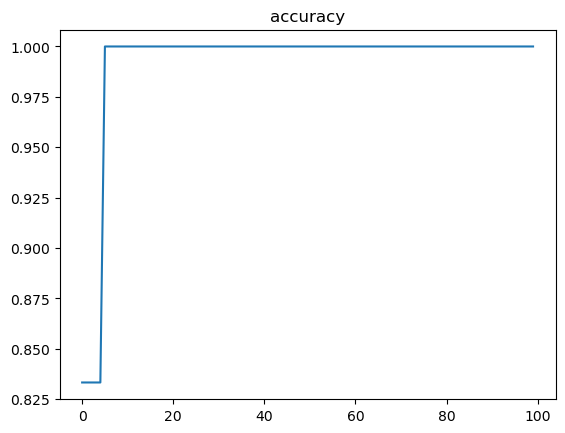

In [413]:
s2 = pd.Series(accuracy_list)
plt.plot(s2)
plt.title('accuracy')
plt.show()

In [415]:
h2 = model(x_train)
pred2 = h2>=torch.FloatTensor([0.5])
pred2.float()

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])